# 資料前處理

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

data_path = "data"

train_df = pd.read_csv(data_path+"/train.csv")
test_df = pd.read_csv(data_path+"/test.csv")

# 保存ID
test_id = test_df.Id

# 填補缺失值，填補0
for col in test_df:
    if test_df[col].dtypes == 'object':
        train_df.fillna('None',inplace=True)
        test_df.fillna('None',inplace=True)
    else:
        train_df.fillna(0,inplace=True)
        test_df.fillna(0,inplace=True)

'''
# 替換字串
LotShape_dict = {'Reg':0,'IR1':1,'IR2':2,'IR3':3, 0:-1}

BsmtExposure_dict = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':-1, 0:-1}
BsmtFinType_dict = {'GLQ':5 ,'ALQ':4 ,'BLQ':3 ,'Rec':2 ,'LwQ':1 ,'Unf':0 ,'NA':-1 , 0:-1}
CentralAir_dict = {'N':0 , 'Y':1, 0:-1}

for col in score_dict_col_list:
    train_df[col] = train_df[col].apply(lambda x: score_dict[x]).astype('int32')
    test_df[col] = test_df[col].apply(lambda x: score_dict[x]).astype('int32')

score_dict = {'Ex':4 ,'Gd':3 ,'TA':2 ,'Fa':1 ,'Po':0, 'NA':-1, 0:-1}
score_dict_col_list = ['ExterQual','ExterCond','BsmtCond','HeatingQC','KitchenQual',
                      'FireplaceQu','GarageQual','GarageCond','PoolQC']

train_df['LotShape'] = train_df['LotShape'].apply(lambda x: LotShape_dict[x]).astype('int32')
test_df['LotShape'] = test_df['LotShape'].apply(lambda x: LotShape_dict[x]).astype('int32')

train_df['BsmtExposure'] = train_df['BsmtExposure'].apply(lambda x: BsmtExposure_dict[x]).astype('int32')
test_df['BsmtExposure'] = test_df['BsmtExposure'].apply(lambda x: BsmtExposure_dict[x]).astype('int32')

train_df['BsmtFinType1'] = train_df['BsmtFinType1'].apply(lambda x: BsmtFinType_dict[x]).astype('int32')
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].apply(lambda x: BsmtFinType_dict[x]).astype('int32')
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].apply(lambda x: BsmtFinType_dict[x]).astype('int32')
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].apply(lambda x: BsmtFinType_dict[x]).astype('int32')

train_df['CentralAir'] = train_df['CentralAir'].apply(lambda x: CentralAir_dict[x]).astype('int32')
test_df['CentralAir'] = test_df['CentralAir'].apply(lambda x: CentralAir_dict[x]).astype('int32')
'''



# 只選取非類別的feature
train_df = train_df.select_dtypes(exclude=['object'])
test_df = test_df.select_dtypes(exclude=['object'])

'''
# 消除無意義的數值欄位
nomeans_num_col = ['MSSubClass']
train_df = train_df.drop(columns=nomeans_num_col)
test_df = test_df.drop(columns=nomeans_num_col)
'''
train_len = train_df.shape[0]
test_len = test_df.shape[0]

# isolation forest
isof = IsolationForest()
isof.fit(train_df)
y_noano = isof.predict(train_df)
normal_index = pd.DataFrame(y_noano,columns=['normal_index'],index=train_df.index)
# 僅保留資料正常值，y_noano為1者
train_df = train_df[normal_index['normal_index']==1]


df_train_y = train_df['SalePrice'].values.reshape(-1,1)
price_scaler = MinMaxScaler()
price_scaler.fit(df_train_y)
norm_train_y = price_scaler.transform(df_train_y)
norm_train_y = pd.DataFrame(norm_train_y,columns=['price'])

train_df.drop(columns=['SalePrice','Id'],inplace=True)
test_df.drop(columns=['Id'],inplace=True)

# normalized
train_len = train_df.shape[0]
test_len = test_df.shape[0]

min_scaler = MinMaxScaler()
df = pd.concat([train_df,test_df],sort=False)

for col in df:
    df[col] = min_scaler.fit_transform(df[col].values.reshape(-1,1))

norm_train_x = df[0:train_len]
norm_test_x = df[train_len:]

print(norm_train_x.shape)
print(norm_test_x.shape)

# 建立validation set
train_x, val_x, train_y, val_y = train_test_split(norm_train_x,norm_train_y)
train_x.head()



c:\users\lclee\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
c:\users\lclee\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
c:\users\lclee\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


(1314, 36)
(1459, 36)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
739,0.235294,0.207668,0.070383,0.666667,0.50,0.954198,0.900000,0.00000,0.000000,0.00000,...,0.384409,0.131320,0.075472,0.0,0.0,0.0,0.0,0.0,0.272727,0.75
1239,0.000000,0.204473,0.067958,0.777778,0.50,0.969466,0.933333,0.02000,0.106733,0.00000,...,0.317204,0.084270,0.044474,0.0,0.0,0.0,0.0,0.0,1.000000,0.25
1205,0.000000,0.287540,0.117559,0.666667,0.75,0.847328,0.683333,0.14625,0.120948,0.11599,...,0.471102,0.058989,0.094340,0.0,0.0,0.0,0.0,0.0,0.454545,0.75
285,0.823529,0.111821,0.025920,0.666667,0.50,0.969466,0.950000,0.00000,0.000000,0.00000,...,0.354839,0.000000,0.072776,0.0,0.0,0.0,0.0,0.0,0.454545,0.25
76,0.000000,0.000000,0.063022,0.333333,0.75,0.587786,0.100000,0.00000,0.056858,0.00000,...,0.190188,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.272727,0.50


# 建立模型

In [11]:
import keras


layer_list = [keras.layers.Dense(500,input_shape=(train_x.shape[1],),activation='relu'),
              keras.layers.Dense(100,activation='relu'),
              keras.layers.Dense(50,activation='relu'),
              keras.layers.Dense(25,activation='relu'),
             keras.layers.Dense(1)]

model = keras.Sequential(layer_list)
model.compile(loss='mean_squared_error',
             optimizer=keras.optimizers.Adam())

training_process = model.fit(train_x,train_y,
                            epochs=50,
                            batch_size=10,
                            validation_data=(val_x,val_y))


Train on 985 samples, validate on 329 samples
Epoch 1/50
985/985 [==============================] - 1s 647us/step - loss: 0.0057 - val_loss: 0.0026
Epoch 2/50
985/985 [==============================] - 0s 350us/step - loss: 0.0026 - val_loss: 0.0022
Epoch 3/50
985/985 [==============================] - 0s 336us/step - loss: 0.0021 - val_loss: 0.0021
Epoch 4/50
985/985 [==============================] - 0s 339us/step - loss: 0.0027 - val_loss: 0.0017
Epoch 5/50
985/985 [==============================] - 0s 333us/step - loss: 0.0024 - val_loss: 0.0026
Epoch 6/50
985/985 [==============================] - 0s 355us/step - loss: 0.0021 - val_loss: 0.0016
Epoch 7/50
985/985 [==============================] - 0s 335us/step - loss: 0.0021 - val_loss: 0.0020
Epoch 8/50
985/985 [==============================] - 0s 337us/step - loss: 0.0022 - val_loss: 0.0017
Epoch 9/50
985/985 [==============================] - 0s 330us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 10/50
985/985 [===============

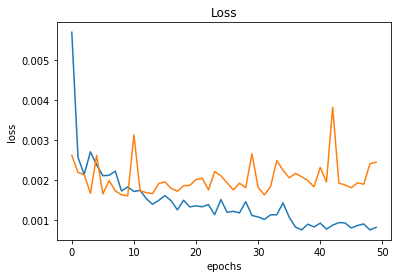

In [12]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(training_process.history['loss'])
plt.plot(training_process.history['val_loss'])
plt.show()

In [13]:
predict_norm = model.predict(norm_test_x)
predict = price_scaler.inverse_transform(predict_norm)

# 做成Dataframe
predict = pd.DataFrame(predict,columns=['SalePrice'])
output_df = pd.concat([test_id,predict],axis=1)
output_df.to_csv('res.csv',index=False)
output_df.head()


,Id,SalePrice
0,1461,128264.320312
1,1462,142412.484375
2,1463,184178.468750
3,1464,186446.765625
4,1465,168893.406250
